In [26]:
import torch
import numpy as np
import torch.optim as optim

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
t_c_train = t_c[random_indexes[:-n_val]]
t_c_val = t_c[random_indexes[-n_val:]]
t_u_train = t_u[random_indexes[:-n_val]]
t_u_val = t_u[random_indexes[-n_val:]]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [27]:
t_un_val.shape

torch.Size([2, 1])

In [32]:
import torch.nn as nn

linear_model = nn.Linear(1,1) #1 input, 1 output
linear_model.weight, linear_model.bias, list(linear_model.parameters())

#linear_model(t_un_train)

(Parameter containing:
 tensor([[0.8444]], requires_grad=True),
 Parameter containing:
 tensor([0.8391], requires_grad=True),
 [Parameter containing:
  tensor([[0.8444]], requires_grad=True),
  Parameter containing:
  tensor([0.8391], requires_grad=True)])

In [30]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, 1 + n_epochs):
        t_p_train = model(t_u_train)
        t_p_val = model(t_u_val)
        
        loss_train = loss_fn(t_p_train, t_c_train)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch <=5 or epoch % 1000 == 0:
            print('epoch %d, training loss %f, validation loss %f' %(epoch, loss_train, loss_val))

In [34]:
training_loop(n_epochs=10000,
              optimizer=optim.SGD(linear_model.parameters(), lr = 0.01),
              model = linear_model,
              loss_fn = nn.MSELoss(),
              t_c_train = t_c_train,
              t_c_val= t_c_val,
              t_u_train = t_un_train,
              t_u_val = t_un_val)

epoch 1, training loss 3.287631, validation loss 1.328355
epoch 2, training loss 3.287631, validation loss 1.328355
epoch 3, training loss 3.287631, validation loss 1.328355
epoch 4, training loss 3.287631, validation loss 1.328355
epoch 5, training loss 3.287631, validation loss 1.328355
epoch 1000, training loss 3.287631, validation loss 1.328355
epoch 2000, training loss 3.287631, validation loss 1.328355
epoch 3000, training loss 3.287631, validation loss 1.328355
epoch 4000, training loss 3.287631, validation loss 1.328355
epoch 5000, training loss 3.287631, validation loss 1.328355
epoch 6000, training loss 3.287631, validation loss 1.328355
epoch 7000, training loss 3.287631, validation loss 1.328355
epoch 8000, training loss 3.287631, validation loss 1.328355
epoch 9000, training loss 3.287631, validation loss 1.328355
epoch 10000, training loss 3.287631, validation loss 1.328355


In [36]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[5.3388]], requires_grad=True),
 Parameter containing:
 tensor([-17.1946], requires_grad=True))

In [82]:
seq_model = nn.Sequential(
        nn.Linear(1,13), #1 input feature, 13 output features, bias is on
                         #13 neurons each having 1 weight and 1 bias
        nn.Tanh(),
        nn.Linear(13,1)) #13 input feature, 1 output feature, bias is on
                         #1 neuoron consisting of 13 weights and 1 bias

[param.shape for param in list(seq_model.parameters())]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [50]:
list(seq_model.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[ 0.6249],
          [-0.9309],
          [ 0.7226],
          [-0.6676],
          [ 0.7355],
          [-0.8487],
          [-0.8656],
          [-0.8276],
          [-0.2112],
          [ 0.3990],
          [ 0.9325],
          [-0.7942],
          [ 0.5249]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([ 0.9980,  0.2400,  0.1347,  0.6745,  0.6173, -0.0554,  0.2223, -0.5251,
          -0.3510,  0.3822,  0.5213, -0.9586, -0.3138], requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[-0.0745, -0.1497,  0.0441, -0.0682, -0.1451,  0.0351,  0.0821,  0.2277,
            0.1167,  0.0449,  0.1321,  0.2600, -0.1151]], requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([0.1856], requires_grad=True))]

In [57]:
from collections import OrderedDict
seq_model_2 = nn.Sequential(OrderedDict([
        ('hidden_linear', nn.Linear(1,9)),
        ('hidden_activation', nn.Tanh()),
        ('output_linear', nn.Linear(9,1))
    ]))

seq_model_2
seq_model_2.hidden_linear.weight, seq_model_2.output_linear.bias

(Parameter containing:
 tensor([[-0.8492],
         [ 0.6658],
         [-0.0822],
         [-0.7200],
         [-0.8459],
         [-0.9568],
         [-0.9336],
         [ 0.8192],
         [-0.0536]], requires_grad=True),
 Parameter containing:
 tensor([0.1565], requires_grad=True))

In [83]:
training_loop(n_epochs=10000,
              optimizer=optim.SGD(seq_model.parameters(), lr=0.01),
              model = seq_model,
              loss_fn=nn.MSELoss(),
              t_u_train=t_un_train,
              t_u_val=t_un_val,
              t_c_train=t_c_train,
              t_c_val=t_c_val)

epoch 1, training loss 180.685059, validation loss 110.184883
epoch 2, training loss 137.278076, validation loss 65.195236
epoch 3, training loss 112.600166, validation loss 39.704937
epoch 4, training loss 98.697594, validation loss 25.690804
epoch 5, training loss 90.551460, validation loss 18.098091
epoch 1000, training loss 6.616647, validation loss 9.056532
epoch 2000, training loss 2.388227, validation loss 8.059824
epoch 3000, training loss 1.531468, validation loss 6.632283
epoch 4000, training loss 1.393967, validation loss 6.173790
epoch 5000, training loss 1.330783, validation loss 5.852991
epoch 6000, training loss 1.291208, validation loss 5.593843
epoch 7000, training loss 1.268069, validation loss 5.422253
epoch 8000, training loss 1.251000, validation loss 5.295042
epoch 9000, training loss 1.234409, validation loss 5.164170
epoch 10000, training loss 1.220584, validation loss 5.053282


In [84]:
list(seq_model.parameters())

t_p = seq_model(t_u * 0.1)

In [72]:
range_t = torch.arange(20,90).unsqueeze(1)
range_t.shape

torch.Size([70, 1])

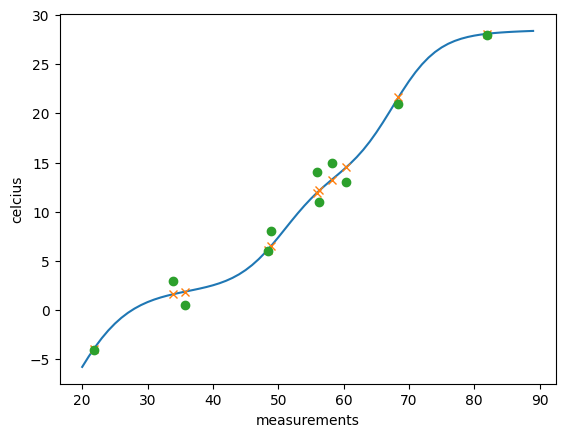

In [85]:
from matplotlib import pyplot as plt

plt.figure(dpi=100)
plt.xlabel('measurements')
plt.ylabel('celcius')
plt.plot(range_t.numpy(), seq_model(range_t * 0.1).detach().numpy())
plt.plot(t_u.numpy(), t_p.detach().numpy(),'x')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')